# Context

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
# Path of the file to read
filepath = "train.csv"

# Read the file into a variable fifa_data
train_data = pd.read_csv(filepath, index_col="PassengerId", parse_dates=True)
train_data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S


# Data quality assessment

In [3]:
train_data.drop_duplicates()
dt_rows_count, dt_columns_count = train_data.shape
dt_rows_count, dt_columns_count

(100000, 11)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [5]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


'Survived' quality assessment

In [6]:
ps_survived_count, ps_unsurvived_count = train_data.Survived.value_counts()
if ps_survived_count + ps_unsurvived_count == dt_rows_count:
    print("'Survived' column is okay.")
bad_survived = train_data[(train_data.Survived.isnull())].shape[0] / train_data.shape[0]
print("'Survived' column has", bad_survived, "% of NULL items.")

'Survived' column is okay.
'Survived' column has 0.0 % of NULL items.


'Pclass' quality assessment

In [7]:
ps_pclass_1_count = train_data[train_data.Pclass == 1].Pclass.shape[0]
ps_pclass_2_count = train_data[train_data.Pclass == 2].Pclass.shape[0]
ps_pclass_3_count = train_data[train_data.Pclass == 3].Pclass.shape[0]
if ps_pclass_1_count + ps_pclass_2_count + ps_pclass_3_count == dt_rows_count:
    print("Pclass column is okay.")
Pclass_survived = train_data[(train_data.Pclass.isnull())].shape[0] / train_data.shape[0]
print("'Pclass' column has", Pclass_survived, "% of NULL items.")

Pclass column is okay.
'Pclass' column has 0.0 % of NULL items.


'Name' quality assessment

In [8]:
bad_name = 100 * train_data[(train_data.Name.isnull())].shape[0] / train_data.shape[0]
print("'Name' column has", bad_name, "% of NULL items.")

'Name' column has 0.0 % of NULL items.


'Sex' quality assessment

In [9]:
bad_Sex = 100 * train_data[(train_data.Sex.isnull())].shape[0] / train_data.shape[0]
print("'Sex' column has", bad_Sex, "% of NULL items.")

'Sex' column has 0.0 % of NULL items.


'Age' quality assessment

In [10]:
bad_Age = 100 * train_data[(train_data.Age.isnull())].shape[0] / train_data.shape[0]
print("'Age' column has", bad_Age, "% of NULL items.")

'Age' column has 3.292 % of NULL items.


'SibSp' quality assessment

In [11]:
bad_SibSp = 100 * train_data[(train_data.SibSp.isnull())].shape[0] / train_data.shape[0]
print("'SibSp' column has", bad_SibSp, "% of NULL items.")

'SibSp' column has 0.0 % of NULL items.


'Parch' quality assessment

In [12]:
bad_Parch = 100 * train_data[(train_data.Parch.isnull())].shape[0] / train_data.shape[0]
print("'Parch' column has", bad_Parch, "% of NULL items.")

'Parch' column has 0.0 % of NULL items.


'Ticket' quality assessment

In [13]:
bad_Ticket = 100 * train_data[(train_data.Ticket.isnull())].shape[0] / train_data.shape[0]
print("'Ticket' column has", bad_Ticket, "% of NULL items.")

'Ticket' column has 4.623 % of NULL items.


'Fare' quality assessment

In [14]:
bad_Fare = 100 * train_data[(train_data.Fare.isnull())].shape[0] / train_data.shape[0]

print("'Fare' column has", bad_Fare, "% of NULL items.")

'Fare' column has 0.134 % of NULL items.


'Cabin' quality assessment

In [15]:
bad_cabin = 100 * train_data[(train_data.Cabin.isnull())].shape[0] / train_data.shape[0]

print("'Cabin' column has", bad_cabin, "% of NULL items.")

'Cabin' column has 67.866 % of NULL items.


'Embarked' quality assessment

In [16]:
bad_Embarked = 100 * train_data[(train_data.Embarked.isnull())].shape[0] / train_data.shape[0]

print("'Embarked' column has", bad_Embarked, "% of NULL items.")

'Embarked' column has 0.25 % of NULL items.


### * 'Cabin' column has ~67% of invalid data. So, I am removing this column.

In [17]:
clean_data = train_data.drop('Cabin', axis='columns')
clean_data.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,S


### * I am collecting all rows and columns include only valid data (not NaN)

In [18]:
clean_data = clean_data[(~(clean_data.Name.isnull())) & (~(clean_data.Sex.isnull())) & (~(clean_data.Age.isnull())) & (~clean_data.SibSp.isnull()) & (~clean_data.Parch.isnull()) & (~(clean_data.Ticket.isnull())) & (~(clean_data.Fare.isnull())) & (~(clean_data.Embarked.isnull()))]
clean_data.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,S


In [19]:
print("There is still", 100 * clean_data.shape[0]/train_data.shape[0], "% of the original data set.")

There is still 91.88 % of the original data set.


# Data exploration

In [20]:
# Apply the default theme
sns.set_theme()

In [21]:
rows_count = clean_data.shape[0]
rows_count

91880

In [22]:
srv_data = clean_data[clean_data.Survived == 1]
srv_data.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
4,1,3,"Bond, Michael",male,25.0,0,0,427635,7.76,S


In [23]:
unsrv_data = clean_data[clean_data.Survived == 0]
unsrv_data.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,S


In [24]:
corr = clean_data.corr()

<AxesSubplot:>

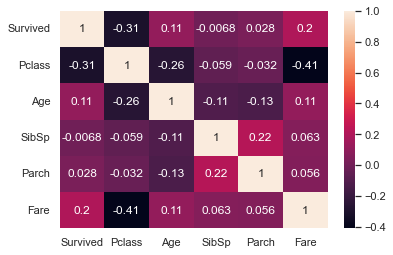

In [25]:
sns.heatmap(corr, xticklabels=corr.columns,  yticklabels=corr.columns, annot=True)

### *Correlation of Pclass and Fare is -0.41 that can show dependencies. 

### *Correlation of Survived and Pclass is -0.31 that can show dependencies.

### *Correlation of SibSp and Parch is 0.22 that can show dependencies.

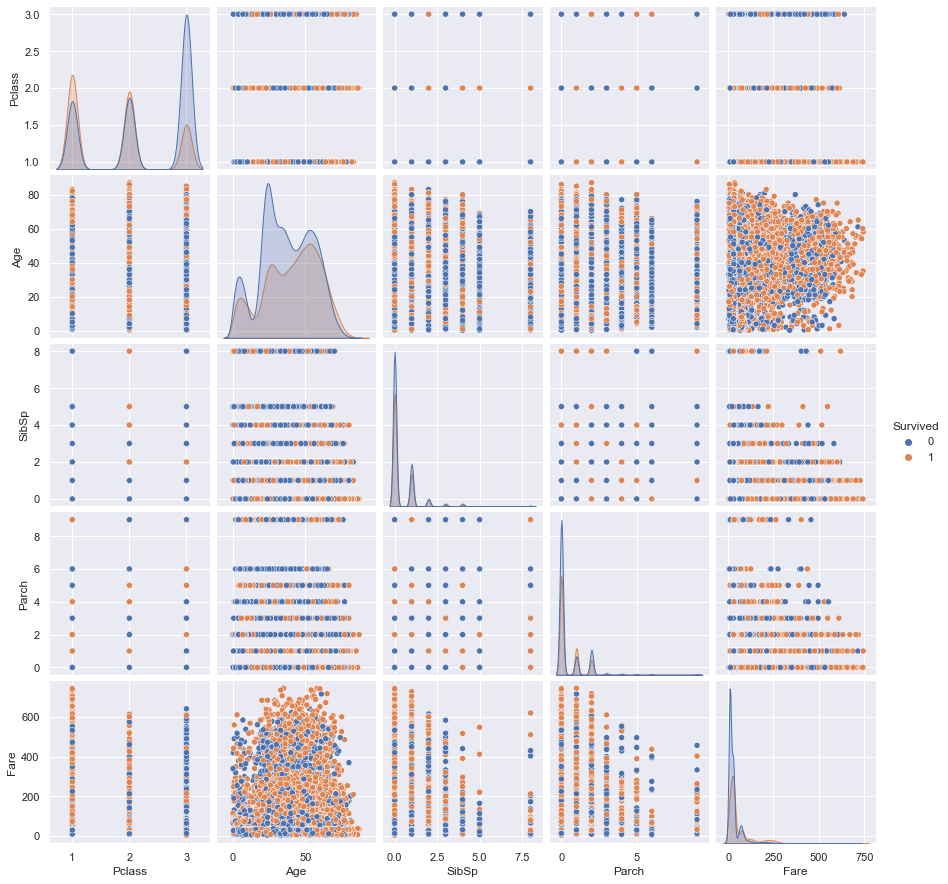

In [26]:
sns.pairplot(data=clean_data, hue='Survived')

## Survived

In [27]:
clean_data['Survived'].describe()

count    91880.000000
mean         0.423520
std          0.494119
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Survived, dtype: float64

In [28]:
unsrv_count, srv_count = clean_data['Survived'].value_counts()

print("Total count of Survived/Unsurvived people  -> ", srv_count, "(",int(100*srv_count/rows_count) ,  "%)/",\
                                                      unsrv_count, "(",int(100*unsrv_count/rows_count) ,"%).")



Total count of Survived/Unsurvived people  ->  38913 ( 42 %)/ 52967 ( 57 %).


<AxesSubplot:xlabel='Survived', ylabel='Count'>

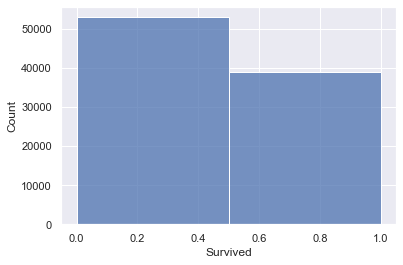

In [29]:
sns.histplot(data=clean_data, x = 'Survived', binwidth=0.5)

## Pclass - 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower)

In [30]:
clean_data['Pclass'].describe()

count    91880.000000
mean         2.072312
std          0.838325
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Pclass, dtype: float64

In [31]:
cl1_count = clean_data[clean_data.Pclass == 1].shape[0]
cl2_count = clean_data[clean_data.Pclass == 2].shape[0]
cl3_count = clean_data[clean_data.Pclass == 3].shape[0]

print("Total count pasageres of 1st class  = ", cl1_count, '(', 100*cl1_count/rows_count,'%)')
print("Total count pasageres of 2st class  = ", cl2_count, '(', 100*cl2_count/rows_count,'%)')
print("Total count pasageres of 3st class  = ", cl3_count, '(', 100*cl3_count/rows_count,'%)')

Total count pasageres of 1st class  =  29204 ( 31.784936874183717 %)
Total count pasageres of 2st class  =  26828 ( 29.198955158902915 %)
Total count pasageres of 3st class  =  35848 ( 39.01610796691337 %)


In [32]:
srv_cl1_count = srv_data[srv_data.Pclass == 1].shape[0]
srv_cl2_count = srv_data[srv_data.Pclass == 2].shape[0]
srv_cl3_count = srv_data[srv_data.Pclass == 3].shape[0]

print("Total count Survived pasageres of 1st class  = ", srv_cl1_count, '(', 100*srv_cl1_count/cl1_count,'%)')
print("Total count Survived pasageres of 2st class  = ", srv_cl2_count, '(', 100*srv_cl2_count/cl2_count,'%)')
print("Total count Survived pasageres of 3st class  = ", srv_cl3_count, '(', 100*srv_cl3_count/cl3_count,'%)')

Total count Survived pasageres of 1st class  =  16937 ( 57.99548007122312 %)
Total count Survived pasageres of 2st class  =  13961 ( 52.03891456687043 %)
Total count Survived pasageres of 3st class  =  8015 ( 22.358290560142827 %)


<AxesSubplot:xlabel='Pclass', ylabel='Count'>

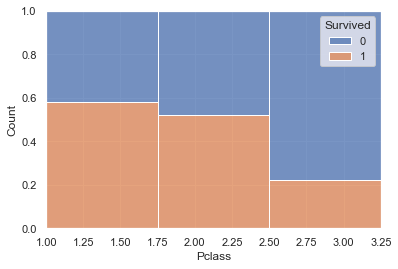

In [33]:
sns.histplot(data=clean_data, x ='Pclass', hue="Survived", multiple="fill", binwidth=0.75 , shrink=1)

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

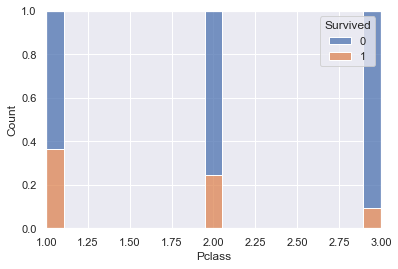

In [34]:
sns.histplot(data=clean_data[clean_data.Sex == 'male'], x ='Pclass', hue="Survived", multiple="fill", )

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

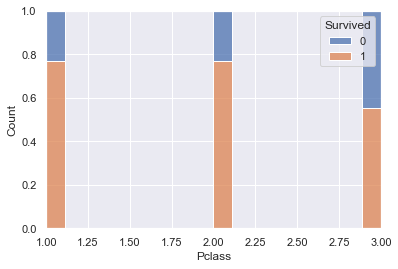

In [35]:
sns.histplot(data=clean_data[clean_data.Sex == 'female'], x ='Pclass', hue="Survived", multiple="fill")

### * Than a Class is higher than a person has a higher priority to survive.
### * Females have priority for surviving.

## Name

This is information can be used to investigate a full family was survived or only partly.

## Sex

In [36]:
male_count = clean_data[clean_data.Sex == 'male'].shape[0]
female_count = clean_data[clean_data.Sex == 'female'].shape[0]
print("Total count of Males  = ", male_count)
print("Total count of Female = ", female_count)


Total count of Males  =  52113
Total count of Female =  39767


In [37]:
srv_male_count = srv_data[srv_data.Sex == 'male'].shape[0]
srv_female_count = srv_data[srv_data.Sex == 'female'].shape[0]
unsrv_male_count = unsrv_data[unsrv_data.Sex == 'male'].shape[0]
unsrv_female_count = unsrv_data[unsrv_data.Sex == 'female'].shape[0]

print("Count of Survived/Unsurvived Males  -> ", srv_male_count,  "(",int(100*srv_male_count/male_count) ,  "%)/",\
                                               unsrv_male_count, "(",int(100*unsrv_male_count/male_count) ,  "%)/")
print("Count of Survived/Unsurvived Female -> ", srv_female_count,"(",int(100*srv_female_count/female_count),"%)/", \
                                                unsrv_female_count,"(",int(100*unsrv_female_count/female_count),"%)/")

print("Persent of Males of Survived peoples   -> ", 100*srv_male_count/srv_count , "%")
print("Persent of Females of Survived peoples -> ", 100*srv_female_count/srv_count , "%")


Count of Survived/Unsurvived Males  ->  10536 ( 20 %)/ 41577 ( 79 %)/
Count of Survived/Unsurvived Female ->  28377 ( 71 %)/ 11390 ( 28 %)/
Persent of Males of Survived peoples   ->  27.075784442217255 %
Persent of Females of Survived peoples ->  72.92421555778274 %


<AxesSubplot:xlabel='Sex', ylabel='Count'>

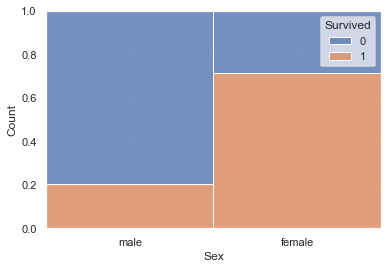

In [38]:
sns.histplot(data=clean_data, x ='Sex', hue="Survived", multiple="fill", binwidth=0.75 , shrink=1)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

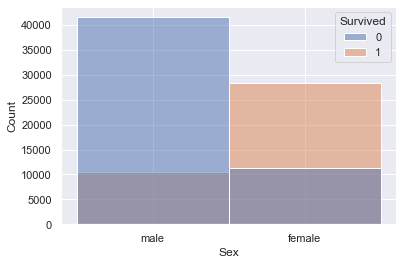

In [39]:
sns.histplot(data=clean_data, x ='Sex', hue="Survived", multiple="layer", binwidth=1 , shrink=1)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

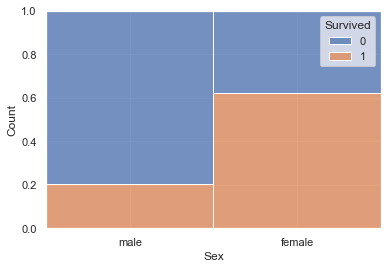

In [40]:
sns.histplot(data=clean_data[clean_data.Age < 18], x ='Sex', hue="Survived", multiple="fill", binwidth=1 , shrink=1)

### * Females have priority for surviving.
### * Children don't have priority of surviving.

## Age

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

In [41]:
clean_data['Age'].describe()

count    91880.000000
mean        38.516882
std         18.303124
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age by Passenger Class')

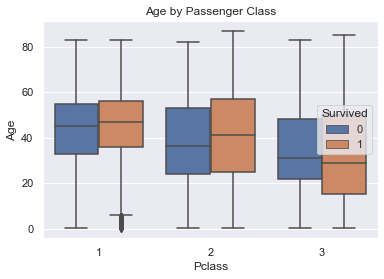

In [42]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=clean_data)
plt.title("Age by Passenger Class")

There is 'outliers' for Survived Passenger of Class 1.

In [43]:
age_data = clean_data[['Survived', 'Age']]
age_freq = age_data.value_counts().sort_values().reset_index()
age_histo = age_freq.sort_values(by='Age')

<AxesSubplot:xlabel='Age', ylabel='Count'>

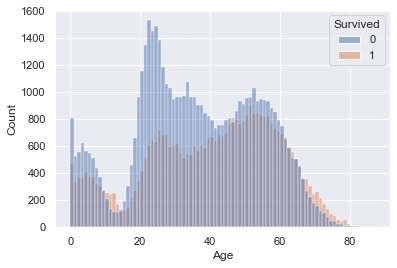

In [44]:
sns.histplot(data=age_data, x = 'Age', hue='Survived', binwidth=1)

Text(0.5, 1.0, 'Dependencies Percent of Surviving by Age')

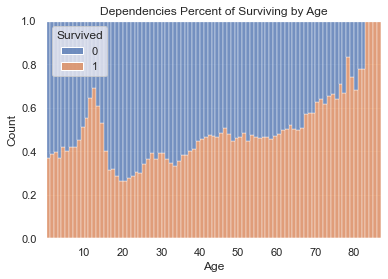

In [45]:
# multiple -> 'layer', 'stack', 'fill', 'dodge'
sns.histplot(data=age_data, x ='Age', hue="Survived", multiple="fill", binwidth=1 , shrink=1)
plt.title("Dependencies Percent of Surviving by Age")

Text(0.5, 1.0, 'Dependencies Percent of Surviving by Age, Only Male')

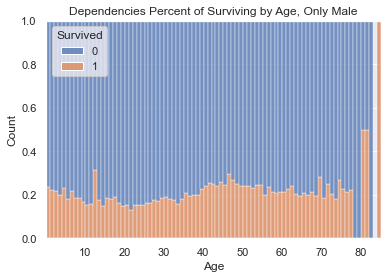

In [46]:
sns.histplot(data=clean_data[clean_data.Sex=='male'], x ='Age', hue="Survived", multiple="fill", binwidth=1 , shrink=1)
plt.title("Dependencies Percent of Surviving by Age, Only Male")

Text(0.5, 1.0, 'Dependencies Percent of Surviving by Age, Only Female')

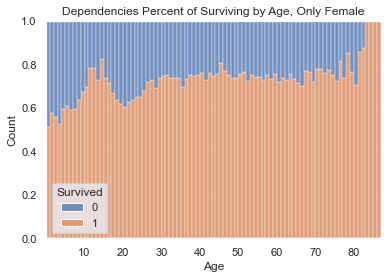

In [47]:
sns.histplot(data=clean_data[clean_data.Sex=='female'], x ='Age', hue="Survived", multiple="fill", binwidth=1 , shrink=1)
plt.title("Dependencies Percent of Surviving by Age, Only Female")

### conclusion: it seems that surviving increases with age.

## SibSp - number of siblings / spouses aboard the Titanic

The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

In [48]:
clean_data['SibSp'].describe()

count    91880.000000
mean         0.394384
std          0.850912
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          8.000000
Name: SibSp, dtype: float64

In [49]:
sib_data = clean_data[['Survived', 'SibSp']]
srv_sib_data = clean_data[clean_data.Survived == 1].SibSp
unsrv_sib_data = clean_data[clean_data.Survived == 0].SibSp

In [50]:
sib_freq = sib_data.groupby('SibSp').count().reset_index()
sib_freq

,SibSp,Survived
0,0,66993
1,1,18804
2,2,3547
3,3,1059
4,4,1070
5,5,125
6,8,282


In [51]:
srv_sib_data.value_counts()

0    28259
1     8138
2     1601
4      402
3      379
8      110
5       24
Name: SibSp, dtype: int64

In [52]:
unsrv_sib_data.value_counts()

0    38734
1    10666
2     1946
3      680
4      668
8      172
5      101
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

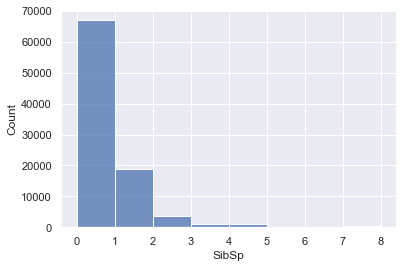

In [53]:
sns.histplot(data=clean_data, x = 'SibSp', binwidth=1)

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

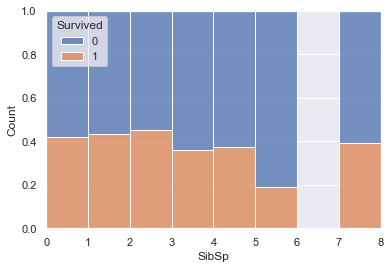

In [54]:
# multiple -> 'layer', 'stack', 'fill', 'dodge'
sns.histplot(data=clean_data, x ='SibSp', hue="Survived", multiple="fill", binwidth=1 , shrink=1)

### conclusion: There are more siblings in a family, then there was a lower chance of surviving.

## SibSp: Survive dependencies of number people for traveling

In [55]:
clean_data[clean_data.SibSp == 0].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,66993.000000,66993.000000,66993.000000,66993.0,66993.000000,66993.000000
mean,0.421820,2.131133,40.311801,0.0,0.283059,40.250300
std,0.493854,0.821506,16.952932,0.0,0.848661,69.135539
min,0.000000,1.000000,0.080000,0.0,0.000000,0.680000
25%,0.000000,1.000000,26.000000,0.0,0.000000,9.360000
50%,0.000000,2.000000,40.000000,0.0,0.000000,16.350000
75%,1.000000,3.000000,54.000000,0.0,0.000000,30.590000
max,1.000000,3.000000,87.000000,0.0,9.000000,744.660000


Text(0.5, 1.0, 'Survived by Sex, Passengers travel alone')

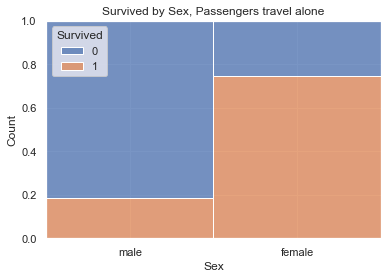

In [56]:
sns.histplot(data=clean_data[clean_data.SibSp == 0], x ='Sex', hue="Survived", multiple="fill", binwidth=1 , shrink=1)
plt.title('Survived by Sex, Passengers travel alone')

Text(0.5, 1.0, 'Relationship of Fare by Age, Passengers travel alone')

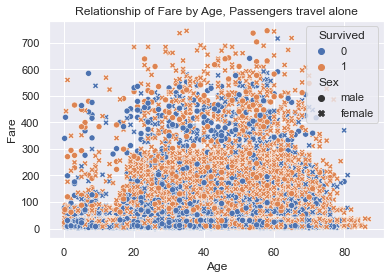

In [57]:
sns.scatterplot(data=clean_data[clean_data.SibSp == 0], x='Age', y='Fare', hue='Survived', style="Sex")
plt.title("Relationship of Fare by Age, Passengers travel alone")

Text(0.5, 1.0, 'Relationship of Fare by Age, Male passengers travel alone')

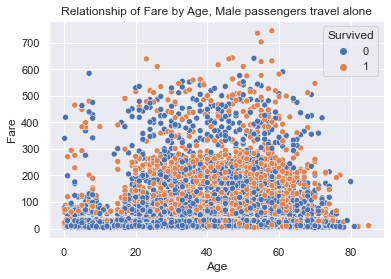

In [58]:
sns.scatterplot(data=clean_data[(clean_data.SibSp == 0) & (clean_data.Sex == 'male')], x='Age', y='Fare', hue='Survived')
plt.title("Relationship of Fare by Age, Male passengers travel alone")

Text(0.5, 1.0, 'Relationship of Fare by Age, Female passengers travel alone')

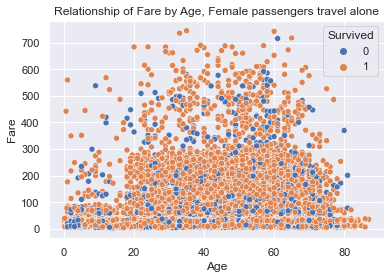

In [59]:
sns.scatterplot(data=clean_data[(clean_data.SibSp == 0) & (clean_data.Sex == 'female')], x='Age', y='Fare', hue='Survived')
plt.title("Relationship of Fare by Age, Female passengers travel alone")

### conclusion: Almost all passengers traveled alone and paid almost max price of a ticket were survived.

In [60]:
clean_data[clean_data.SibSp == 1].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,18804.000000,18804.000000,18804.000000,18804.0,18804.000000,18804.000000
mean,0.432780,1.890874,32.637367,1.0,1.021857,63.000248
std,0.495474,0.877550,21.086810,0.0,1.062630,74.828471
min,0.000000,1.000000,0.080000,1.0,0.000000,3.660000
25%,0.000000,1.000000,8.000000,1.0,0.000000,27.050000
50%,0.000000,2.000000,36.000000,1.0,1.000000,32.490000
75%,1.000000,3.000000,51.000000,1.0,2.000000,74.420000
max,1.000000,3.000000,83.000000,1.0,9.000000,727.650000


Text(0.5, 1.0, 'Survived by Sex, Passengers Travel with wife/husband')

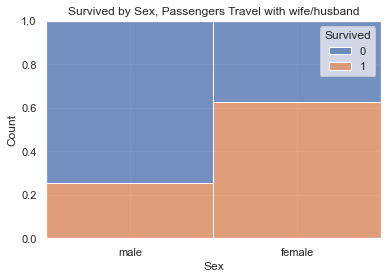

In [61]:
sns.histplot(data=clean_data[clean_data.SibSp == 1], x ='Sex', hue="Survived", multiple="fill", binwidth=1 , shrink=1)
plt.title('Survived by Sex, Passengers Travel with wife/husband')

Text(0.5, 1.0, 'Relationship of Fare by Age, Passengers travel in pair')

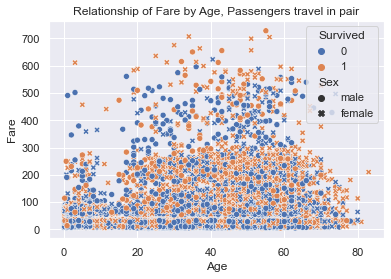

In [62]:
sns.scatterplot(data=clean_data[clean_data.SibSp == 1], x='Age', y='Fare', hue='Survived', style="Sex")
plt.title("Relationship of Fare by Age, Passengers travel in pair")

### conclusion: for passengers traveled in pair there is the observation that percent of survived males was higher than that percent of survived males who traveled alone. For female is vice versa, percent of survived females was lower than that percent of survived ones who traveled alone.

In [63]:
clean_data[clean_data.SibSp == 2].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,3547.000000,3547.000000,3547.000000,3547.0,3547.000000,3547.000000
mean,0.451367,1.897942,39.135238,2.0,0.660840,49.958985
std,0.497699,0.793916,18.503515,0.0,1.072524,71.423979
min,0.000000,1.000000,0.170000,2.0,0.000000,3.890000
25%,0.000000,1.000000,26.000000,2.0,0.000000,20.840000
50%,0.000000,2.000000,41.000000,2.0,0.000000,27.840000
75%,1.000000,3.000000,54.000000,2.0,1.000000,51.820000
max,1.000000,3.000000,83.000000,2.0,9.000000,614.920000


Text(0.5, 1.0, 'Survived by Sex, Passengers Travel with wife/husband and 1 child')

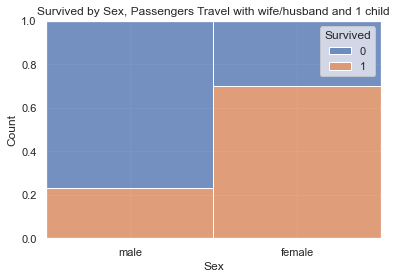

In [64]:
sns.histplot(data=clean_data[clean_data.SibSp == 2], x ='Sex', hue="Survived", multiple="fill", binwidth=1 , shrink=1)
plt.title('Survived by Sex, Passengers Travel with wife/husband and 1 child')

Text(0.5, 1.0, 'Relationship of Fare by Age, Passengers travel in pair with a child or one with 2 children')

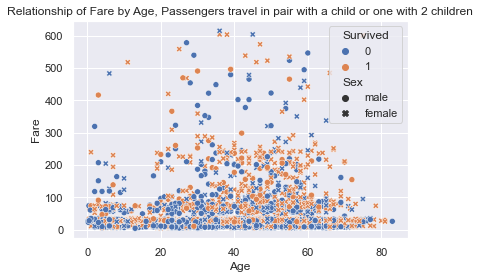

In [65]:
sns.scatterplot(data=clean_data[clean_data.SibSp == 2], x='Age', y='Fare', hue='Survived', style="Sex")
plt.title("Relationship of Fare by Age, Passengers travel in pair with a child or one with 2 children")

In [66]:
clean_data[clean_data.SibSp == 3].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1059.000000,1059.000000,1059.000000,1059.0,1059.000000,1059.000000
mean,0.357885,1.853636,38.919981,3.0,0.868744,54.168319
std,0.479604,0.885887,18.716665,0.0,1.172606,70.567542
min,0.000000,1.000000,0.420000,3.0,0.000000,4.500000
25%,0.000000,1.000000,25.000000,3.0,0.000000,21.150000
50%,0.000000,2.000000,40.000000,3.0,0.000000,29.420000
75%,1.000000,3.000000,54.000000,3.0,2.000000,66.160000
max,1.000000,3.000000,77.000000,3.0,9.000000,583.170000


Text(0.5, 1.0, 'Survived by Sex, Passengers Travel with wife/husband and 2 children')

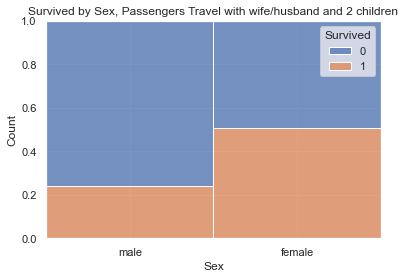

In [67]:
sns.histplot(data=clean_data[clean_data.SibSp == 3], x ='Sex', hue="Survived", multiple="fill", binwidth=1 , shrink=1)
plt.title('Survived by Sex, Passengers Travel with wife/husband and 2 children')

Text(0.5, 1.0, 'Relationship of Fare by Age, Passengers travel in pair with 2 children or one with 3 children')

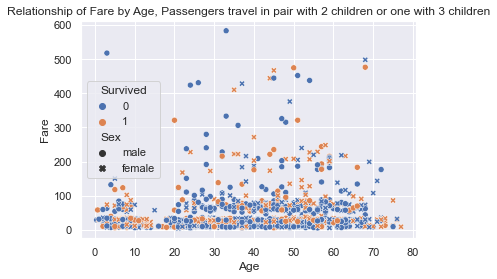

In [68]:
sns.scatterplot(data=clean_data[clean_data.SibSp == 3], x='Age', y='Fare', hue='Survived', style="Sex")
plt.title("Relationship of Fare by Age, Passengers travel in pair with 2 children or one with 3 children")

In [69]:
clean_data[clean_data.SibSp == 4].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1070.000000,1070.000000,1070.000000,1070.0,1070.000000,1070.000000
mean,0.375701,2.301869,29.873215,4.0,0.849533,35.575037
std,0.484530,0.697112,20.337204,0.0,0.892110,39.088510
min,0.000000,1.000000,0.080000,4.0,0.000000,5.290000
25%,0.000000,2.000000,8.000000,4.0,0.000000,20.992500
50%,0.000000,2.000000,30.000000,4.0,1.000000,28.525000
75%,1.000000,3.000000,47.000000,4.0,1.000000,32.937500
max,1.000000,3.000000,80.000000,4.0,9.000000,516.750000


Text(0.5, 1.0, 'Survived by Sex, Passengers Travel with wife/husband and 2 children')

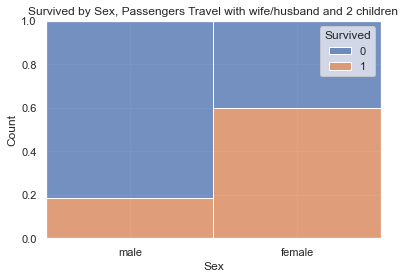

In [70]:
sns.histplot(data=clean_data[clean_data.SibSp == 4], x ='Sex', hue="Survived", multiple="fill", binwidth=1 , shrink=1)
plt.title('Survived by Sex, Passengers Travel with wife/husband and 2 children')

## Parch - number of parents / children aboard the Titanic

The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [71]:
clean_data['Parch'].value_counts()

0    67039
1    12142
2    10662
3      835
4      430
5      318
9      258
6      196
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='Count'>

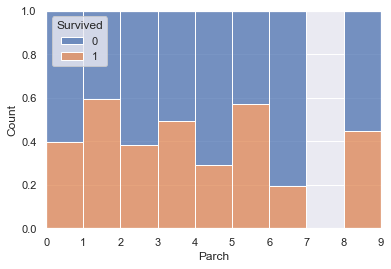

In [72]:
# multiple -> 'layer', 'stack', 'fill', 'dodge'
sns.histplot(data=clean_data, x ='Parch', hue="Survived", multiple="fill", binwidth=1 , shrink=1)

### *Nanny

Text(0.5, 1.0, 'Babies with a nanny and without siblings')

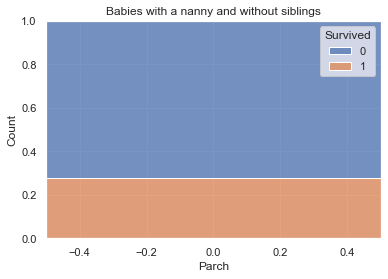

In [73]:
nanny_0_1 = clean_data[(clean_data.Age < 1) & (clean_data.Parch == 0) & (clean_data.SibSp == 0)]
sns.histplot(data=nanny_0_1, x ='Parch', hue="Survived", multiple="fill",)
plt.title("Babies with a nanny and without siblings")

Text(0.5, 1.0, '[1, 11) year old children with a nanny and without siblings')

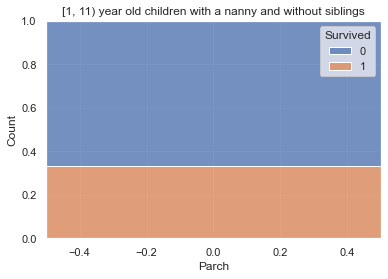

In [74]:
nanny_1_11 = clean_data[(clean_data.Age >= 1) & (clean_data.Age < 11) & (clean_data.Parch == 0) & (clean_data.SibSp == 0)]
sns.histplot(data=nanny_1_11, x ='Parch', hue="Survived", multiple="fill")
plt.title("[1, 11) year old children with a nanny and without siblings")

Text(0.5, 1.0, '[11, 18) year old children with a nanny and without siblings')

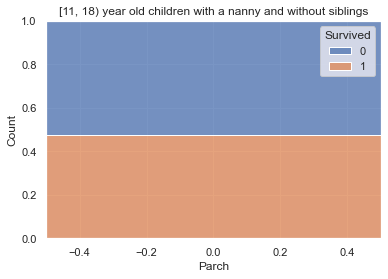

In [75]:
nanny_11_18 = clean_data[(clean_data.Age >= 11) & (clean_data.Age < 18) & (clean_data.Parch == 0) & (clean_data.SibSp == 0)]
sns.histplot(data=nanny_11_18, x ='Parch', hue="Survived", multiple="fill",)
plt.title("[11, 18) year old children with a nanny and without siblings")

### conclusion:  Some children who travelled only with a nanny and without siblings had small chances of surviving.

### *Child with parents

Text(0.5, 1.0, 'Babies with a family')

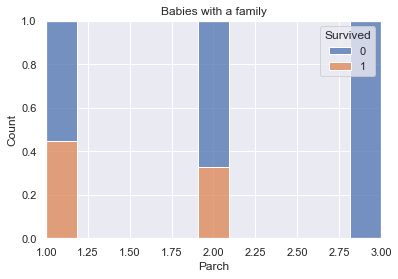

In [76]:
fam_0_1 = clean_data[(clean_data.Age < 1) & (clean_data.Parch != 0)]
sns.histplot(data=fam_0_1, x ='Parch', hue="Survived", multiple="fill",)
plt.title("Babies with a family")

Text(0.5, 1.0, 'Children with a family')

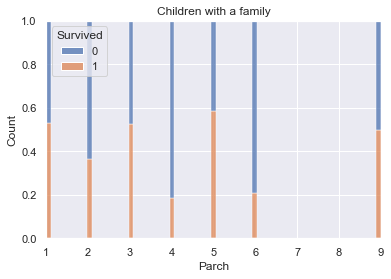

In [77]:
fam_1_11 = clean_data[(clean_data.Age >= 1) & (clean_data.Age < 11) & (clean_data.Parch != 0)]
sns.histplot(data=fam_1_11, x ='Parch', hue="Survived", multiple="fill",)
plt.title("Children with a family")

Text(0.5, 1.0, 'Children with a family')

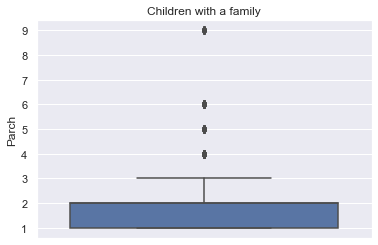

In [78]:
sns.boxplot(data=fam_1_11, y ='Parch', hue="Survived")
plt.title("Children with a family")

Text(0.5, 1.0, 'Children with a family')

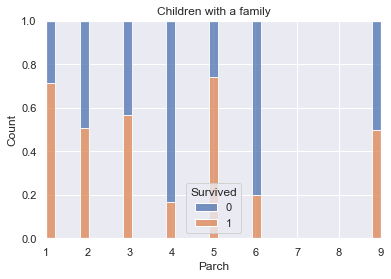

In [79]:
fam_11_18 = clean_data[(clean_data.Age >= 11) & (clean_data.Age < 18) & (clean_data.Parch != 0)]
sns.histplot(data=fam_11_18, x ='Parch', hue="Survived", multiple="fill",)
plt.title("Children with a family")

Text(0.5, 1.0, 'Children with a family')

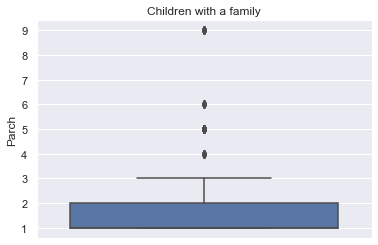

In [80]:
sns.boxplot(data=fam_11_18, y ='Parch', hue="Survived")
plt.title("Children with a family")

### conclusion:  Children with one parent have a higher percent of surviving than other children.

<AxesSubplot:xlabel='SibSp', ylabel='Parch'>

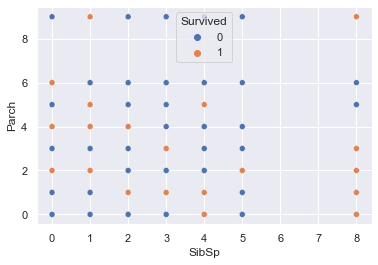

In [81]:
sns.scatterplot(data=clean_data, x = 'SibSp', y='Parch', hue='Survived')

## Ticket

In [82]:
clean_data['Ticket'].describe()

count     91880
unique    73025
top        A/5 
freq        575
Name: Ticket, dtype: object

### Collect information by Ticket

In [83]:
ticket_serv = clean_data[['Ticket', 'Survived']].groupby('Ticket').sum().reset_index()
ticket_serv.head(1)

,Ticket,Survived
0,10000,1


In [84]:
#sns.scatterplot(data=clean_data, x = 'Ticket', y='Parch', hue='Survived')

In [85]:
ticket_freq = clean_data['Ticket'].value_counts().reset_index()
ticket_freq.columns = ["Ticket", "passengers_count"] # count -> number passengers in one cabin
ticket_freq.head(1)

,Ticket,passengers_count
0,A/5,575


In [86]:
ticket_data = ticket_freq.merge(ticket_serv, how='inner')
ticket_data.head(1)

,Ticket,passengers_count,Survived
0,A/5,575,210


In [87]:
srv_passenger_count_in_cabin = ticket_data.groupby('passengers_count').sum().reset_index()
passenger_count_in_cabin = ticket_freq.groupby('passengers_count').count().reset_index()
ticket_count_data = passenger_count_in_cabin.merge(srv_passenger_count_in_cabin, how='inner')
ticket_count_data = ticket_count_data.sort_values('passengers_count').reset_index()
ticket_count_data.head(5)

,index,passengers_count,Ticket,Survived
0,0,1,61671,25629
1,1,2,7331,6582
2,2,3,2512,3319
3,3,4,956,1651
4,4,5,370,799


In [88]:
per_ticket_count_data = ticket_count_data.apply(lambda x: 100*x.Survived/(x.Ticket*x.passengers_count), axis=1).reset_index()
ticket_count_data = ticket_count_data.merge(per_ticket_count_data, how='inner')
ticket_count_data

,index,passengers_count,Ticket,Survived,0
0,0,1,61671,25629,41.557620
1,1,2,7331,6582,44.891556
2,2,3,2512,3319,44.041932
3,3,4,956,1651,43.174686
4,4,5,370,799,43.189189
5,5,6,116,295,42.385057
6,6,7,35,96,39.183673
7,7,8,12,36,37.500000
8,8,9,5,17,37.777778
9,9,10,2,10,50.000000


<AxesSubplot:xlabel='index', ylabel='0'>

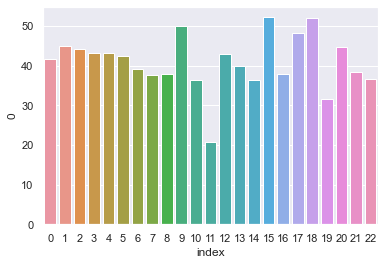

In [89]:
sns.barplot(data=ticket_count_data, x='index', y=0)

## Fare

In [90]:
clean_data['Fare'].describe()

count    91880.000000
mean        45.404697
std         70.774805
min          0.680000
25%         10.230000
50%         25.160000
75%         34.432500
max        744.660000
Name: Fare, dtype: float64

In [91]:
clean_data['Fare'].value_counts()

9.85      83
9.18      76
9.27      74
9.52      74
9.68      72
          ..
53.33      1
141.32     1
517.81     1
194.61     1
4.06       1
Name: Fare, Length: 15626, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

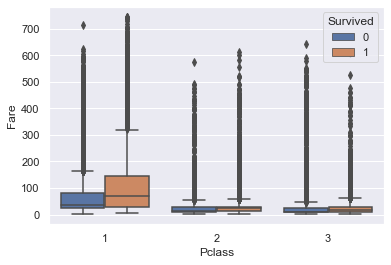

In [92]:
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=clean_data)

Text(0.5, 1.0, 'Relationship of Fare by Age')

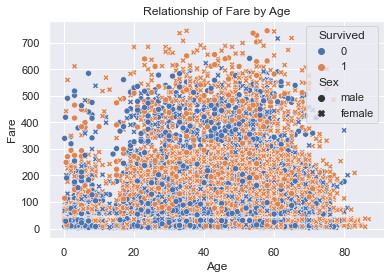

In [93]:
sns.scatterplot(data=clean_data, x='Age', y='Fare', hue='Survived', style="Sex")
plt.title("Relationship of Fare by Age")

## Embarked

Port of Embarkation : 
C = Cherbourg, Q = Queenstown, S = Southampton

In [94]:
clean_data['Embarked'].describe()

count     91880
unique        3
top           S
freq      65506
Name: Embarked, dtype: object

In [95]:
clean_data['Embarked'].value_counts()

S    65506
C    21200
Q     5174
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Passenger count by Embarked')

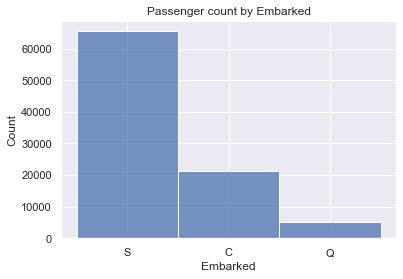

In [96]:
sns.histplot(x='Embarked', data=clean_data)
plt.title("Passenger count by Embarked")

Text(0.5, 1.0, 'Histogram of Passenger count at Class by Embarked, Divided by Class')

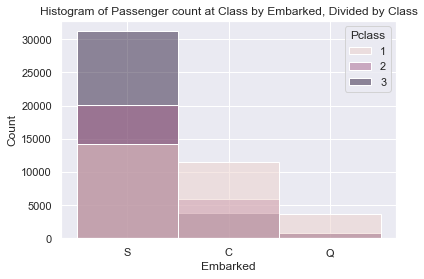

In [97]:
sns.histplot(x='Embarked', hue='Pclass', data=clean_data)
plt.title("Histogram of Passenger count at Class by Embarked, Divided by Class")

Text(0.5, 1.0, 'Fare at Class by Embarked')

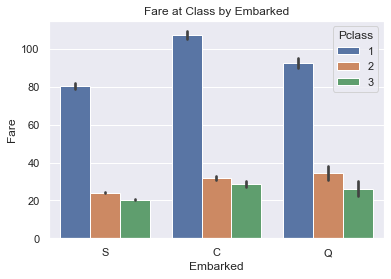

In [98]:
sns.barplot(x='Embarked', y='Fare', hue='Pclass', data=clean_data)
plt.title("Fare at Class by Embarked")

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

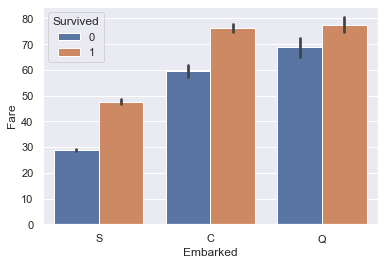

In [99]:
sns.barplot(x='Embarked', y='Fare', hue='Survived', data=clean_data)

 ###  conclusion: If a Price(Fare) is higher, a person has a higher priority to survive. This is the same conclusion as in Passenger Class.

# Summary

* Data preparation: 
   (1) 'Cabin' column has ~67% of invalid data. So, the column was removed. 
   (2)  Rows with NaN were removed.
   (3)  There is still 91.88 % of the original data set which is using for EDA.

* Near 42% of passenger were survived.

* Females have priority for surviving.

* Children don't have priority for surviving.

* It seems that a priority of surviving increases with age.

* Than a Class is higher than a person has a higher priority to survive.

* Almost all passengers traveled alone and paid almost max price of a ticket were survived.

* For passengers traveled in pair there is the observation that percent of survived males was higher than that percent of survived males who traveled alone. For female is vice versa, percent of survived females was lower than that percent of survived ones who traveled alone.

* A surviving percent of passengers traveled with a family is lower than a surviving percent of passengers traveled alone.

* There are more siblings in a family, then there was a lower chance of surviving.

*  Some children who travelled only with a nanny and without siblings had small chances of surviving.

*  Children with one parent have a higher percent of surviving than other children.

* 'Fare' and 'Pclass' columns show the similar information, because ticket depends on 'Pclass'. 
   The correlation between 'Fare' and 'Pclass' is |-0.41| = 0.41  which confirms this idea. 